# Capstone Project - Telco Customer Churn #

In [199]:
# 2) Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier 


In [200]:
# 3) Load the dataset
DATA_PATH = "Telco-Customer-Churn.csv" 
df = pd.read_csv(DATA_PATH)

# 4) Display the first ten rows of the dataset
print("First 10 rows of the dataset:")
display(df.head(10))

# 5) Output the names of the dataset's columns
print("\nColumn names:")
print(list(df.columns))

# 6) Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

First 10 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types of each column:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [201]:
# 7) Convert "Total Charges" to numeric, coercing errors to NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# 8) Remove rows with missing values
df = df.dropna().copy()

# 9) Remove the "customerID" column
df = df.drop(columns=["customerID"])

# 10) Convert "Churn" column to binary (1 for "Yes", 0 for "No")
if "Churn" in df.columns:
    if df["Churn"].dtype == 'object':
        df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0).astype(int)
    else:
        df["Churn"] = df["Churn"].astype(int)

# 11) One-hot encode categorical variables
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
telecom_cust_dummies = pd.get_dummies(df, columns=cat_cols, dtype=int)


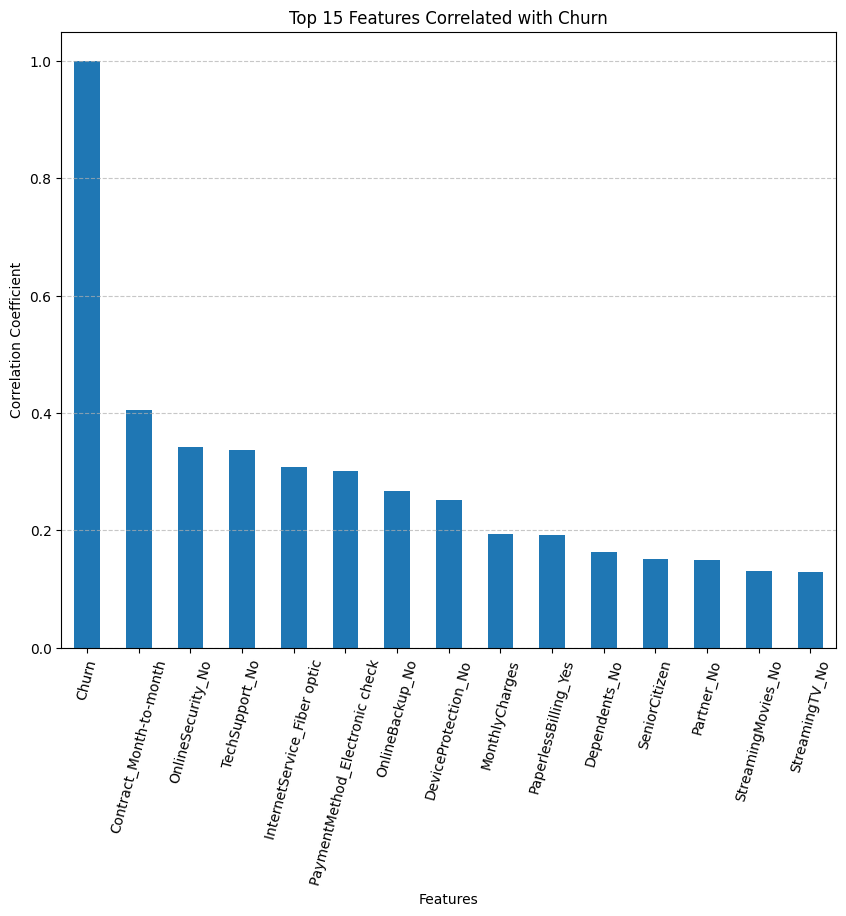

In [202]:
# 12) Create correlation plot to visualize correlations between features and the target variable "Churn"
correlation_matrix = telecom_cust_dummies.corr()
churn_correlation = correlation_matrix["Churn"].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
churn_correlation.head(15).plot(kind='bar')
plt.title("Top 15 Features Correlated with Churn")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=75)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()


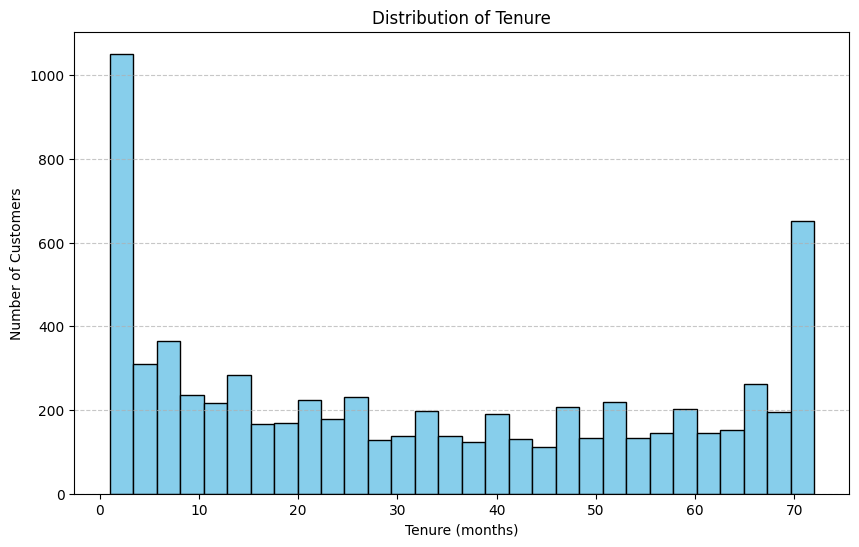

In [203]:
# 13) Create a histogram of the "tenure" column 
plt.figure(figsize=(10, 6))
plt.hist(df["tenure"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()



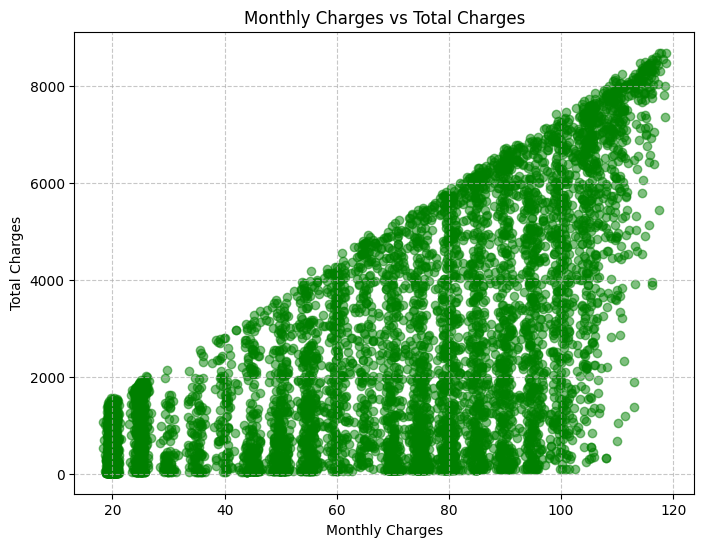

In [204]:
# 14) Scatter plot of "MonthlyCharges" vs "TotalCharges"
plt.figure(figsize=(8, 6))
plt.scatter(df["MonthlyCharges"], df["TotalCharges"], alpha=0.5, color='green')
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.grid(linestyle='--', alpha=0.7)
plt.show()


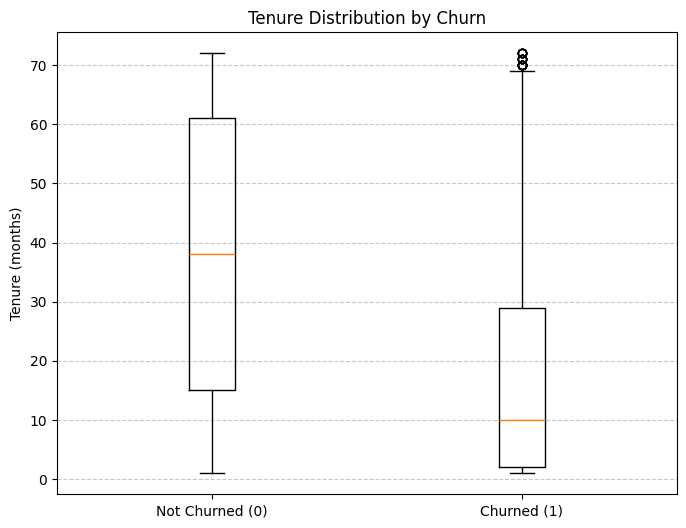

In [205]:
# 15) Box plot to compare "tenure" for churned and non-churned customers
plt.figure(figsize=(8,6))

# Create two groups based on churn
data_to_plot = [df[df["Churn"] == 0]["tenure"], 
                df[df["Churn"] == 1]["tenure"]]

plt.boxplot(data_to_plot, tick_labels=["Not Churned (0)", "Churned (1)"])
plt.title("Tenure Distribution by Churn")
plt.ylabel("Tenure (months)")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

In [206]:
# 16 ) Scale all variables to a range of 0 to 1 using Min-Max scaling
scaler = MinMaxScaler()

# Fit and transform the telecom_cust_dummies DataFrame
scaled_array = scaler.fit_transform(telecom_cust_dummies)

# Convert back to DataFrame (keep same column names)
telecom_cust_scaled = pd.DataFrame(scaled_array, columns=telecom_cust_dummies.columns)

# Quick check
print("Scaled DataFrame shape:", telecom_cust_scaled.shape)
telecom_cust_scaled.head()


Scaled DataFrame shape: (7032, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [207]:
# 17) Split the dataet into training and test sets with test size of 25%
X = telecom_cust_scaled.drop(columns=["Churn"])
y = telecom_cust_scaled["Churn"]

# Split into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (5274, 45) (5274,)
Test set shape: (1758, 45) (1758,)


In [208]:
# 18)Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on training data
logreg.fit(X_train, y_train)

print("Model training completed.")

# 19) Make predictions on the test data 
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print("Predictions (first 10):", y_pred[:10])
print("Predicted Probabilities (first 10):", y_pred_proba[:10])

# 20) Calculate and print the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Test Data: {accuracy:.4f}")



Model training completed.
Predictions (first 10): [1. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
Predicted Probabilities (first 10): [0.59591886 0.00976261 0.51335534 0.78813231 0.11955787 0.21015002
 0.00659098 0.31618506 0.79655275 0.03703295]
Model Accuracy on Test Data: 0.8049


In [209]:
# 21) Create a random forest classifier and tune 

rf = RandomForestClassifier( 
    n_estimators = 2000,
    oob_score=True,
    max_features='sqrt',
    max_leaf_nodes=50, 
    bootstrap=True,
    random_state=42, 
    n_jobs=-1
    )

# 22) Train/fit the model
rf.fit(X_train, y_train)

# OOB accuracy estimate 
print(f"OOB Accuracy: {rf.oob_score_:.4f}")


OOB Accuracy: 0.8043


In [210]:
# 23) Make predictions on the test data
y_pred_rf = rf.predict(X_test)

# Predict probabilities of churn 
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Predictions (first 10):", y_pred_rf[:10])
print("Random Forest Predicted Probabilities (first 10):", y_pred_proba_rf[:10])

Random Forest Predictions (first 10): [1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
Random Forest Predicted Probabilities (first 10): [0.67029763 0.0429289  0.42610911 0.72733353 0.10875    0.22074554
 0.0329426  0.25561556 0.7392282  0.0615933 ]


In [211]:
# 24) Calculate and print the accuracy of the random forest model on the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy on Test Data: {accuracy_rf:.4f}")



Random Forest Model Accuracy on Test Data: 0.7964


In [212]:
# 25) Calculate and print OOB error estimation 
print(f"OOB Error Estimate: {1 - rf.oob_score_:.4f}")

OOB Error Estimate: 0.1957


 # OOB error estimate and unseen data generalised
 -On unseen data, you can expect the Random Forest to correctly classify about 80% of customers 
 
 -Having an 80% shows that the model is reliable 

Confusion Matrix - Logistic Regression:
[[1147  144]
 [ 199  268]]
Confusion Matrix - Random Forest:
[[1174  117]
 [ 241  226]]


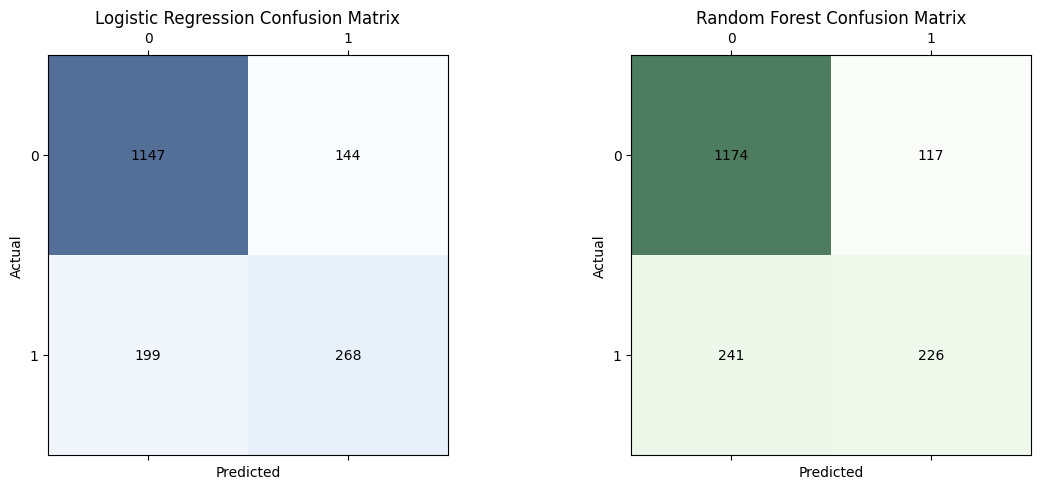

In [213]:
# 26) Confusion matrix for both logistic regression and random forest models
cm_logreg = confusion_matrix(y_test, y_pred)
print("Confusion Matrix - Logistic Regression:")
print(cm_logreg)

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix - Random Forest:")
print(cm_rf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes [0].matshow(cm_logreg, cmap=plt.cm.Blues, alpha=0.7)
for (i, j), value in np.ndenumerate(cm_logreg):
    axes[0].text(j, i, f"{value}", ha='center', va='center')
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

axes[1].matshow(cm_rf, cmap=plt.cm.Greens, alpha=0.7)
for (i, j), value in np.ndenumerate(cm_rf):
    axes[1].text(j, i, f"{value}", ha='center', va='center')
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [214]:
# 27 ) Compute precision and recall scores for each model

# Logistic Regression
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
print(f"Logistic Regression - Precision: {precision_logreg:.4f}, Recall: {recall_logreg:.4f}")

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")


Logistic Regression - Precision: 0.6505, Recall: 0.5739
Random Forest - Precision: 0.6589, Recall: 0.4839


# Confusion Matrix Insights 
Logistic Regression 
- About 65% of customers that were predicted as churners actually churned
- Recall = 0.5739 which means the model caught about 57% of all real churners 
- It misses 43% of churners, but when it flags someone at risk it is usually correct. 

Random Forest 
- Similar to logistic regeession with around 66% 
- The recall is lower than logistic regression, catching only 48% of churners
- Random forest produces fewer false positives but more false negatives. 

# Conclusion

- If the company wants to catch as many churners as possible logistic regression would be better to use because of higher recall
- If the company wants to minimise wasted retention offers, random forests is better because of fewer false positives
- Since churn prevention is usually more valuable than retention, the logistic effort may be a better fit here. 
